In [242]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
result_csv_paths = glob.glob("./output/perf_parquet*.csv")

In [397]:
result_csv_paths = glob.glob("./output/Jun3/perf_geojson*.csv")

In [223]:
result_csv_paths = glob.glob("./output/Jun4/perf_parquet*.csv")

In [224]:
len(result_csv_paths)

105

In [398]:
result = pd.concat([pd.read_csv(f"{fn}") for fn in glob.glob("./output/Jun3/perf_geojson*.csv")])

In [377]:
result = pd.concat([pd.read_csv(f"{fn}") for fn in glob.glob("./output/Jun4/perf_parquet*.csv")])

In [380]:
result.query('id == 438601312892825').radius_meter.unique()

array([   500,   9000, 300000,   2000, 150000, 350000, 200000,   5000,
          800,    700,  70000,  60000,  80000,  40000, 400000,   8000,
       250000,   3000,   1000, 450000,  30000,   7000,  10000,   6000,
          200,   4000,  90000,    900, 100000,    300,  50000,    600,
          100,  20000,    400])

In [375]:
_res = pd.concat([pd.read_csv(f"{fn}") for fn in glob.glob("./output/Jun4/perf_parquet*.csv")]).reset_index(drop=True)
bestp = _res.loc[_res.groupby(['prec','id','radius_meter']).query_time.idxmin()]

In [376]:
_res

,prec,id,radius_meter,hash_time,query_time,join_time,fetched,valid
0,3,198059460557723,500,0.000113,0.037364,0.006477,456,2
1,3,198059460557723,500,0.000116,0.033368,0.006720,456,2
2,3,198059460557723,500,0.000115,0.034972,0.006652,456,2
3,3,107603119267331,500,0.000108,0.040422,0.007129,4547,1
4,3,107603119267331,500,0.000123,0.040080,0.007099,4547,1
...,...,...,...,...,...,...,...,...
940,4,107603119267331,200000,0.006313,5.916835,0.125915,67758,51323
941,4,107603119267331,200000,0.006321,5.924897,0.118797,67758,51323
942,4,438601312892825,200000,0.006242,14.418262,1.004570,486035,451052
943,4,438601312892825,200000,0.006567,6.005478,1.001080,486035,451052


In [350]:
_res = pd.concat([pd.read_csv(f"{fn}") for fn in glob.glob("./output/Jun3/perf_geojson*.csv")]).reset_index(drop=True)
bestg = _res.loc[_res.groupby(['prec','id','radius_meter']).query_time.idxmin()]

In [355]:
p = bestp.groupby(['id','radius_meter']).query_time.min().reset_index()

In [356]:
g = bestg.groupby(['id','radius_meter']).query_time.min().reset_index()

In [374]:
bestg.query('radius_meter == 100').sort_values('id')

,prec,id,radius_meter,hash_time,query_time,join_time,fetched,valid
490,3,107603119267331,100,0.000121,0.539978,0.007006,4547,1
563,4,107603119267331,100,0.000117,0.034840,0.006016,82,1
688,5,107603119267331,100,0.000127,0.146321,0.005962,53,1
488,3,198059460557723,100,0.000125,0.085254,0.006214,456,1
686,5,198059460557723,100,0.000166,0.156926,0.005935,28,1
560,4,198059460557723,100,0.000123,0.050164,0.006378,221,1
493,3,438601312892825,100,0.000175,26.814481,0.104338,190261,15
565,4,438601312892825,100,0.000120,1.538913,0.009543,13214,15
691,5,438601312892825,100,0.000124,0.303126,0.006674,469,15


In [360]:
merged = pd.merge(p,g,on=['id','radius_meter'],suffixes=("_parquet","_geojson"))

In [361]:
merged['ratio'] = merged.eval("query_time_geojson / query_time_parquet")

In [367]:
print(merged.groupby('id').agg({'ratio':['mean','min','median','max']}).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{4}{r}{ratio} \\
 & mean & min & median & max \\
id &  &  &  &  \\
\midrule
107603119267331 & 5.967634 & 0.649742 & 1.467020 & 45.416545 \\
198059460557723 & 8.261460 & 0.773088 & 1.955846 & 38.975051 \\
438601312892825 & 23.580646 & 3.117785 & 19.892767 & 55.140246 \\
\bottomrule
\end{tabular}



In [363]:
merged.describe()

,id,radius_meter,query_time_parquet,query_time_geojson,ratio
count,1.050000e+02,105.000000,105.000000,105.000000,105.000000
mean,2.480880e+14,77128.571429,0.588504,20.415576,12.603247
std,1.403531e+14,123714.070708,1.147973,50.502330,15.584826
min,1.076031e+14,100.000000,0.032368,0.021295,0.649742
25%,1.076031e+14,900.000000,0.033321,0.063853,1.508366
50%,1.980595e+14,9000.000000,0.074705,0.306893,2.788444
75%,4.386013e+14,90000.000000,0.435061,10.014668,19.892767
max,4.386013e+14,450000.000000,5.658935,274.487369,55.140246


In [354]:
p.join(g)

AttributeError: 'Series' object has no attribute 'join'

In [ ]:
bestp = result

In [399]:
result = result.reset_index(drop=True)

In [227]:
best = result.loc[result.groupby(['prec','id','radius_meter']).query_time.idxmin()]

In [167]:
best

,prec,id,radius_meter,hash_time,query_time,join_time,fetched,valid
13774,3,373322015605,500,0.000152,0.114602,0.008280,5232,1
17774,3,373322015605,1000,0.000113,0.119253,0.007216,5232,1
11474,3,373322015605,1500,0.000129,0.076721,0.007802,5232,1
26074,3,373322015605,2000,0.000114,0.077973,0.007389,5232,1
6174,3,373322015605,2500,0.000127,0.097869,0.007688,5232,2
...,...,...,...,...,...,...,...,...
15388,4,2530260593685129,100000,0.001996,4.974082,0.081003,43944,33630
18788,4,2530260593685129,150000,0.003635,7.457590,0.131645,68763,61872
21688,4,2530260593685129,200000,0.006340,11.422921,0.210166,117561,101376
8288,4,2530260593685129,250000,0.009592,15.490989,0.348370,176018,153830


In [182]:
best

,prec,id,radius_meter,hash_time,query_time,join_time,fetched,valid
490,3,107603119267331,100,0.000121,0.539978,0.007006,4547,1
401,3,107603119267331,200,0.000114,0.563409,0.007324,4547,1
176,3,107603119267331,300,0.000109,0.531546,0.006731,4547,1
923,3,107603119267331,400,0.000111,0.529895,0.006853,4547,1
599,3,107603119267331,500,0.000112,0.516379,0.006937,4547,1
...,...,...,...,...,...,...,...,...
304,5,438601312892825,250000,0.305068,174.569927,1.448923,539506,535865
1716,5,438601312892825,300000,0.440434,251.239084,1.800288,678015,664422
249,5,438601312892825,350000,0.598684,328.468248,2.315459,897454,872788
1599,5,438601312892825,400000,0.791488,532.948735,3.494330,1274135,1257155


In [91]:
sns_df = result.groupby(['prec','radius_meter']).median().reset_index()

In [168]:
result.groupby('id').fetched.first().reset_index().sort_values('fetched',ascending=False)

,id,fetched
97,2251799820327070,268739
60,438601312892825,239248
51,366492367327289,234285
77,815036591907027,186726
45,279700048867112,142293
...,...,...
4,105259254448509,288
79,979382765507018,212
26,143267839017641,198
34,155328524613646,160


In [400]:
result.id.unique()

array([198059460557723, 107603119267331, 438601312892825])

In [401]:
p = result.id.unique()[2]

[None]

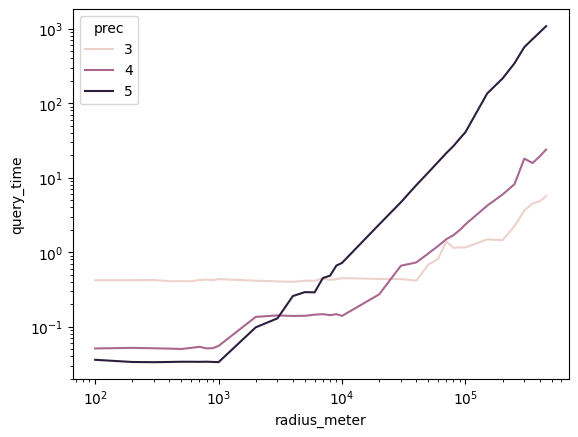

In [239]:
ax = sns.lineplot(x="radius_meter", y="query_time",
             hue="prec", 
             data=best.query('id == @p'))
ax.set(xscale='log')
ax.set(yscale='log')

In [235]:
#result['avg'] = result.eval('1.0*(hash_time + query_time+ join_time) / fetched')

In [383]:
result.prec.unique()

array([3, 4, 5])

[None]

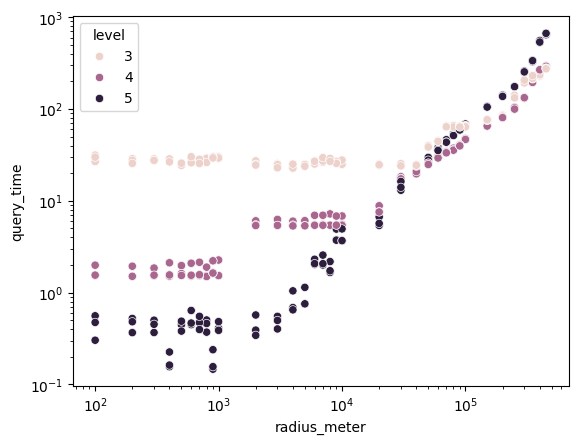

In [402]:
ax = sns.scatterplot(x="radius_meter", y="query_time",
             hue="level", 
             data=result.query('id == @p').rename(columns={'prec':'level'}))
ax.set(xscale='log')
ax.set(yscale='log')

In [403]:
fig = ax.get_figure()
fig.savefig("../assets/qt_rm_345_high_den_geojson.png",dpi=300)

In [244]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [245]:
result = pd.concat([pd.read_csv(f"{fn}") for fn in glob.glob("./output/Jun3/perf_parquet*.csv")])

In [250]:
result = result.reset_index(drop=True)

In [257]:
result = result.query('radius_meter < 70000')

In [258]:
best = result.loc[result.groupby(['prec','id','radius_meter']).query_time.idxmin()]

In [297]:
best.groupby(['prec','radius_meter']).id.count()

prec  radius_meter
3     500             100
      1000            100
      1500            100
      2000            100
      2500            100
                     ... 
5     45000           100
      50000           100
      55000           100
      60000           100
      65000           100
Name: id, Length: 93, dtype: int64

In [301]:
best.dtypes

prec              int64
id                int64
radius_meter      int64
hash_time       float64
query_time      float64
join_time       float64
fetched           int64
valid             int64
dtype: object

In [334]:
minmax = best.groupby(['id','radius_meter']).agg({'query_time':['min','max','median']}).reset_index()\
.set_axis(['id','radius_meter','min_query','max_query','med_query'],axis=1).astype({'radius_meter':'str'})

In [338]:
minmax['ratio2'] = minmax['max_query'] / minmax['min_query']
minmax['ratio'] = minmax['med_query'] / minmax['min_query']

In [342]:
minmax.describe()

,id,min_query,max_query,med_query,ratio,ratio2
count,3.100000e+03,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,5.681766e+14,0.233742,3.456092,0.540549,2.987955,12.865378
std,6.053891e+14,0.377654,6.908186,0.695815,3.309293,20.669001
min,3.733220e+11,0.032897,0.042213,0.033617,1.000252,1.015731
25%,1.411925e+14,0.056787,0.204280,0.112671,1.339917,2.507901
50%,3.276676e+14,0.108082,0.504787,0.238372,1.824520,4.523634
75%,6.042479e+14,0.237851,2.608562,0.703847,3.047527,13.705254
max,2.530261e+15,4.203569,46.203964,4.938987,41.788370,301.759599


In [323]:
minmax_m = minmax.melt(id_vars=['id','radius_meter'], value_vars=['max_query','med_query'])\
.rename(columns={'variable':'','value':'time'})

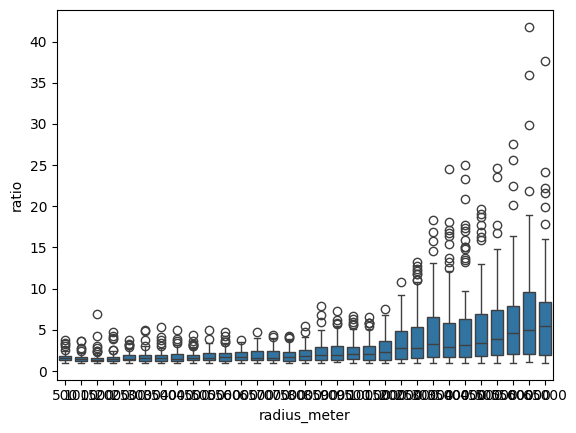

In [390]:
ax = sns.boxplot(
    data=minmax,  x="radius_meter",y="ratio",
    dodge=True, zorder=1, legend=False,
)

In [ ]:
sns.stripplot(
    data=iris, x="value", y="measurement", hue="species",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

In [341]:
ax.get_figure().savefig("../assets/time_saved.png",dpi=300)

<Axes: xlabel='radius_meter', ylabel='ratio'>

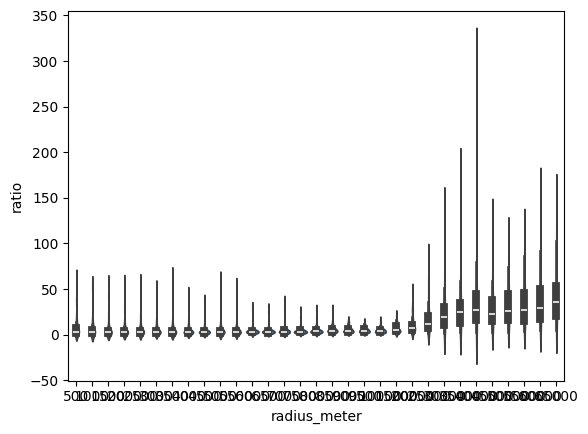

In [327]:
sns.violinplot(data=minmax, x="radius_meter", y="ratio")

/tmp/ipykernel_263071/3097318026.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


[Text(0.0, 0, '0'),
 Text(20.0, 0, '20'),
 Text(40.0, 0, '40'),
 Text(60.0, 0, '60'),
 Text(80.0, 0, '80'),
 Text(100.0, 0, '100'),
 Text(120.0, 0, '120')]

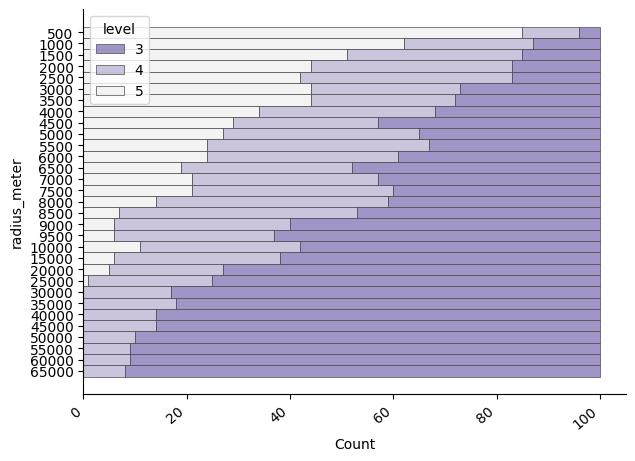

In [392]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

hp = sns.histplot(
    best.loc[best.groupby(['id','radius_meter']).query_time.idxmin()]\
    .astype({'radius_meter':'str'}).rename(columns={'prec':'level'}),
    y="radius_meter", hue="level",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [393]:
hp.get_figure().savefig("../assets/best_level_by_radius.png",dpi=300)

<Axes: xlabel='price', ylabel='Count'>

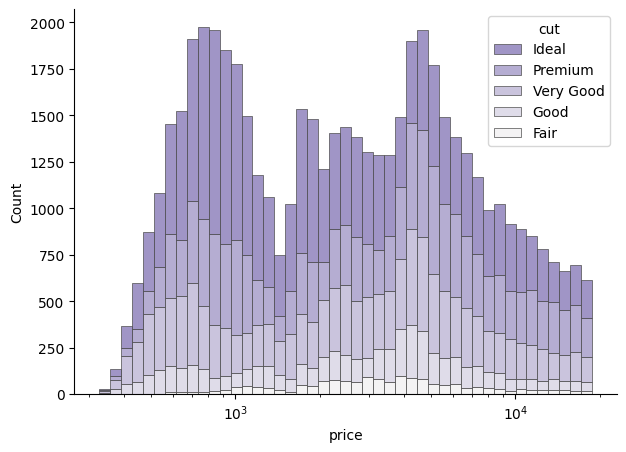

In [292]:
diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [293]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [295]:
best.loc[best.groupby(['id','radius_meter']).query_time.idxmin()]

,prec,id,radius_meter,hash_time,query_time,join_time,fetched,valid
10474,5,373322015605,500,0.000124,0.034306,0.006424,2,1
174,5,373322015605,1000,0.000169,0.073594,0.006310,3,1
20474,5,373322015605,1500,0.000174,0.068970,0.006226,3,1
34874,5,373322015605,2000,0.000165,0.065222,0.006187,3,1
8874,3,373322015605,2500,0.000127,0.097869,0.007688,5232,2
...,...,...,...,...,...,...,...,...
34088,3,2530260593685129,45000,0.000148,0.309516,0.019237,28324,3062
24088,3,2530260593685129,50000,0.000171,0.332512,0.030878,28324,3472
14888,3,2530260593685129,55000,0.000146,0.276469,0.026307,28324,4900
14588,3,2530260593685129,60000,0.000174,0.387410,0.028531,28324,7156


In [266]:
best_max_range = best.loc[best.groupby(['id','radius_meter']).query_time.idxmin()].groupby(['id','prec']).radius_meter.max().reset_index()

In [273]:
range_df = pd.pivot_table(best_max_range, values='radius_meter', index=['id'],
                       columns=['prec']).reset_index().fillna(0)

In [276]:
range_df.columns = ['place_id','level_3','level_4','level_5']

In [288]:
range_df = range_df.astype({'place_id':'str'}).sort_values('level_5')

In [289]:
range_df 

,place_id,level_3,level_4,level_5
13,117143914970749,55000.0,65000.0,0.0
17,123034394410268,65000.0,45000.0,0.0
87,1459816170975554,65000.0,2000.0,0.0
30,149986081841655,65000.0,50000.0,0.0
96,2251799819300783,65000.0,15000.0,0.0
...,...,...,...,...
12,113822714554172,65000.0,0.0,20000.0
27,144702872217522,65000.0,0.0,20000.0
37,175639546498078,65000.0,0.0,20000.0
29,146467672039517,65000.0,60000.0,20000.0


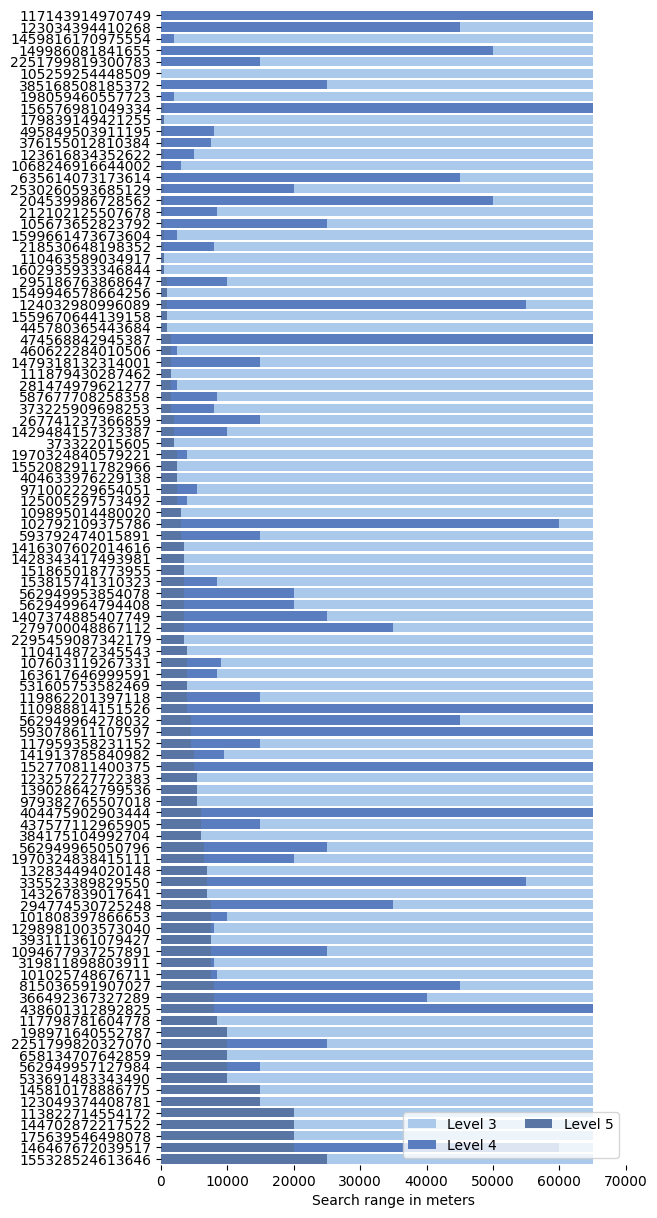

In [290]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="level_3", y="place_id", data=range_df,
            label="Level 3", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="level_4", y="place_id", data=range_df,
            label="Level 4", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("deep")
sns.barplot(x="level_5", y="place_id", data=range_df,
            label="Level 5", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 70000), ylabel="",
       xlabel="Search range in meters")
sns.despine(left=True, bottom=True)